<a href="https://colab.research.google.com/github/Mathiassule/Machine-Learning/blob/main/Time_Series_Forecasting_on_Electricity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
import os
print(os.listdir())

['.config', 'Electric_Production.csv', 'sample_data']


In [3]:
data = pd.read_csv('Electric_Production.csv')

In [4]:
data.sample(5)

,DATE,IPG2211A2N
245,6/1/2005,99.5076
240,1/1/2005,111.1614
20,9/1/1986,61.0005
62,3/1/1990,73.1964
218,3/1/2003,94.5532


In [5]:
data.set_index('DATE')

,IPG2211A2N
DATE,
1/1/1985,72.5052
2/1/1985,70.6720
3/1/1985,62.4502
4/1/1985,57.4714
5/1/1985,55.3151
...,...
9/1/2017,98.6154
10/1/2017,93.6137
11/1/2017,97.3359


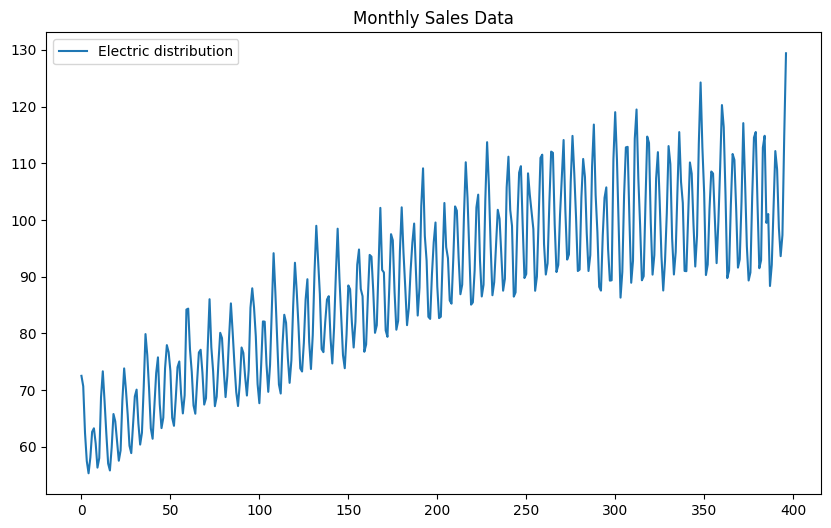

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(data['IPG2211A2N'], label='Electric distribution')
plt.title('Monthly Sales Data')
plt.legend()
plt.show()

In [7]:
data_po = data.set_index('DATE')

In [8]:
decomposition = seasonal_decompose(data_po, model='additive', period=1)

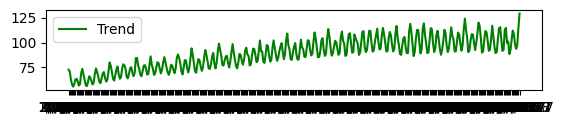

In [9]:
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='green')
plt.legend(loc='upper left')

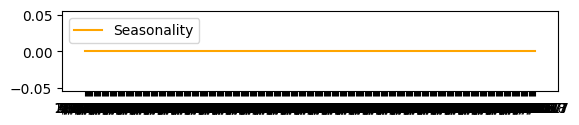

In [10]:
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality', color='orange')
plt.legend(loc='upper left')

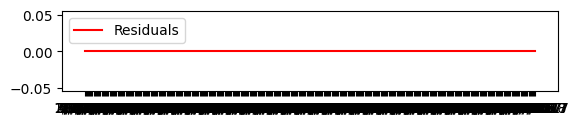

In [11]:
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals', color='Red')
plt.legend(loc='upper left')

# Check for Stationarity

### **Using Rolling Mean and Standard Deviation**

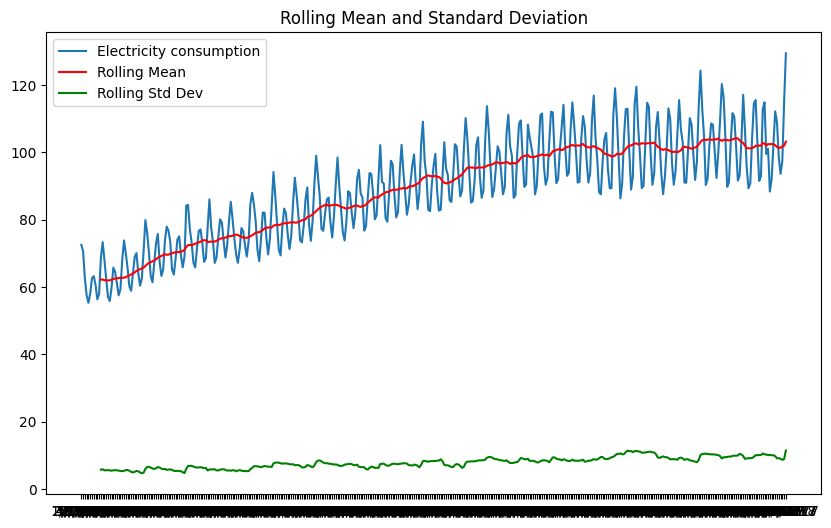

In [12]:
# Calculate rolling statistics
rolling_mean = data_po['IPG2211A2N'].rolling(window=12).mean()
rolling_std = data_po['IPG2211A2N'].rolling(window=12).std()

# Plot rolling statistics
plt.figure(figsize=(10, 6))
plt.plot(data_po['IPG2211A2N'], label='Electricity consumption')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_std, label='Rolling Std Dev', color='green')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.show()

# Using  Dickey Fuller Test

In [13]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
adf_test = adfuller(data_po['IPG2211A2N'])
print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')

# Check critical values
for key, value in adf_test[4].items():
    print(f'Critical Value ({key}): {value}')

ADF Statistic: -2.256990350047235
p-value: 0.1862146911658712
Critical Value (1%): -3.4476305904172904
Critical Value (5%): -2.869155980820355
Critical Value (10%): -2.570827146203181


##  ADF Test Analysis
 ADF Statistic: -2.257
 p-value: 0.186
 Critical Values:
   - 1%: -3.448
   - 5%: -2.869
   - 10%: -2.571

### Interpretation:
 The ADF statistic is higher than all critical values, and the p-value is above 0.05.
 → We fail to reject the null hypothesis of non-stationarity.
 → The time series is likely non-stationary and may require differencing or transformation.


## Conclusion:
*The ADF test confirms that the time series is non-stationary, meaning that the mean is not constant and likely has a trend and seasonality. This aligns with what we saw in the plot, where both a trend and seasonality were visually obvious.*

# Converting Non-Stationary to Stationary Time Series

### Using first-order differencing

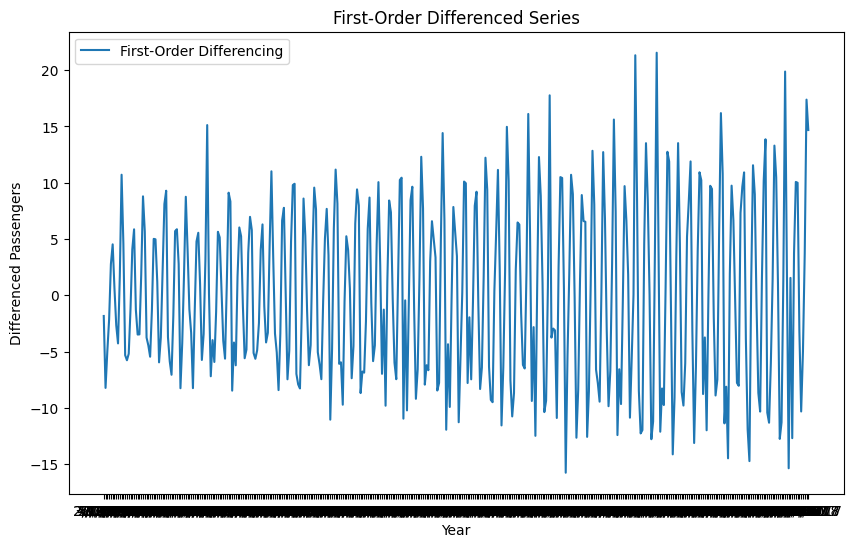

ADF Statistic (Differenced): -7.104890882267311
p-value (Differenced): 4.0777865655394095e-10


In [14]:
# Apply first-order differencing
data_diff = data_po['IPG2211A2N'].diff().dropna()

# Plot the differenced data
plt.figure(figsize=(10, 6))
plt.plot(data_diff, label='First-Order Differencing')
plt.title('First-Order Differenced Series')
plt.xlabel('Year')
plt.ylabel('Differenced Passengers')
plt.legend()
plt.show()

# Perform ADF test on differenced data
adf_test_diff = adfuller(data_diff)
print(f'ADF Statistic (Differenced): {adf_test_diff[0]}')
print(f'p-value (Differenced): {adf_test_diff[1]}')

## 📊 ADF Test Analysis After First-Order Differencing

### 🔄 Differenced Series
- First-order differencing removes trend and stabilizes variance.
- The resulting series is centered around zero, with no obvious trend or seasonality.

### 📈 Plot Interpretation
- The plot of the differenced series shows fluctuations around a constant mean.
- This visual pattern suggests the series may now be stationary.

### 🧪 ADF Test Results
- **ADF Statistic**: -7.105  
- **p-value**: 4.08e-10  
- **Critical Values**:
  - 1%: -3.448  
  - 5%: -2.869  
  - 10%: -2.571  

### ✅ Key Insights
- The ADF statistic is significantly lower than all critical values.
- The p-value is far below 0.05, allowing us to reject the null hypothesis of non-stationarity.
- The series is now stationary and ready for time series modeling (e.g., ARIMA, SARIMA).


# Performing ARIMA on my dataset

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             IPG2211A2N   No. Observations:                  397
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1308.795
Date:                Tue, 26 Aug 2025   AIC                           2623.589
Time:                        09:00:13   BIC                           2635.533
Sample:                    01-01-1985   HQIC                          2628.321
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0732      0.091      0.805      0.421      -0.105       0.251
ma.L1          0.5450      0.070      7.737      0.000       0.407       0.683
sigma2        43.4248      3.296     13.175      0.0

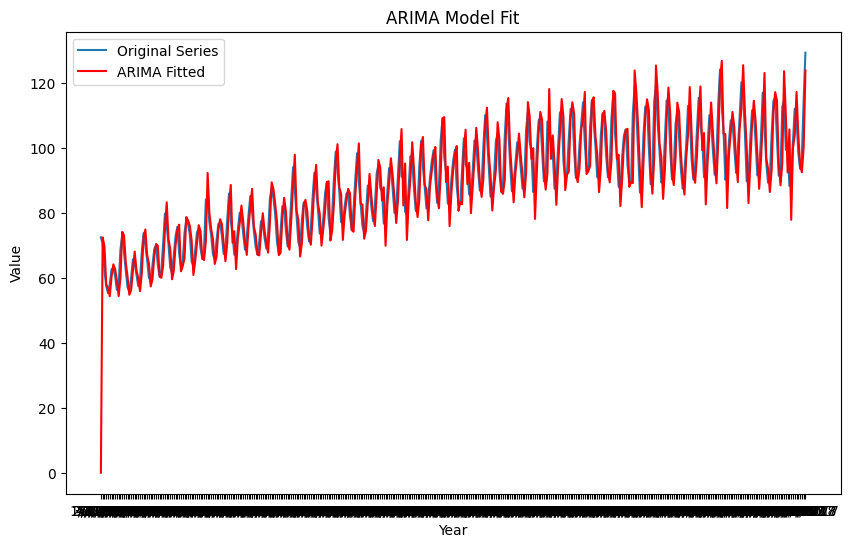

In [15]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Fit ARIMA model (example: ARIMA(1,1,1))
model = ARIMA(data_po['IPG2211A2N'], order=(1, 1, 1))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Plot the fitted values vs actual
plt.figure(figsize=(10, 6))
plt.plot(data_po['IPG2211A2N'], label='Original Series')
plt.plot(model_fit.fittedvalues, label='ARIMA Fitted', color='red')
plt.title('ARIMA Model Fit')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()


# Interpretation of the ARIMA Model Fit
### Model Used: ARIMA(1,1,1) — this means:

p=1: One autoregressive term, suggesting the current value is influenced by the previous value.

d=1: First-order differencing was applied to make the series stationary.

q=1: One moving average term, indicating the model accounts for past forecast errors.

## ADF Test on Differenced Data:

ADF Statistic: −7.10

p-value: 4.08e−10

✅ This strongly rejects the null hypothesis of non-stationarity, confirming your differenced series is stationary.

## Plot Insights:

The red line (ARIMA fitted values) closely follows the original series, especially in smoother regions.

Some deviation may occur during sharp spikes or dips — this is typical, as ARIMA models are better at capturing linear trends than abrupt changes.

The residuals (difference between actual and fitted) should ideally resemble white noise. If they don’t, it might suggest room for model refinement.

# Forecasting Future Values with ARIMA

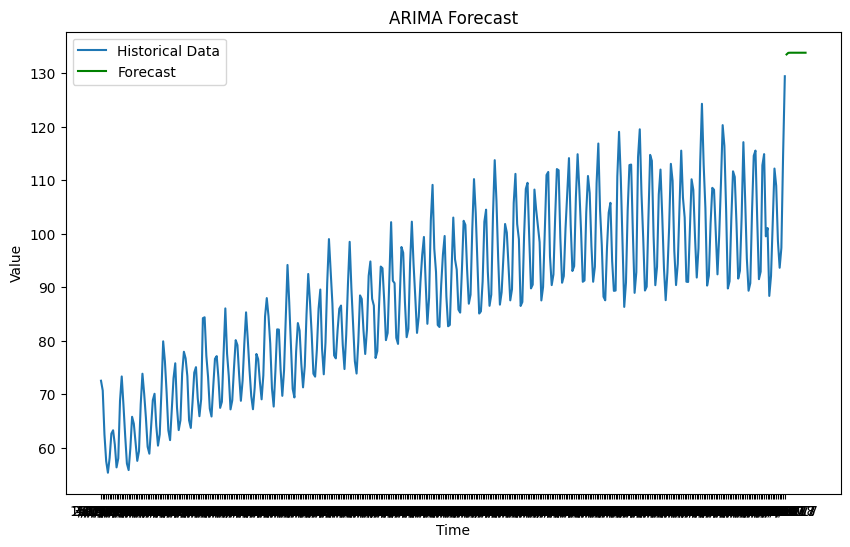

In [16]:
# Forecast the next 12 periods (adjust as needed)
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(data_po['IPG2211A2N'], label='Historical Data')
plt.plot(
    range(len(data_po), len(data_po) + forecast_steps),
    forecast,
    label='Forecast',
    color='green'
)
plt.title('ARIMA Forecast')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


# Forecast with Confidence Intervals

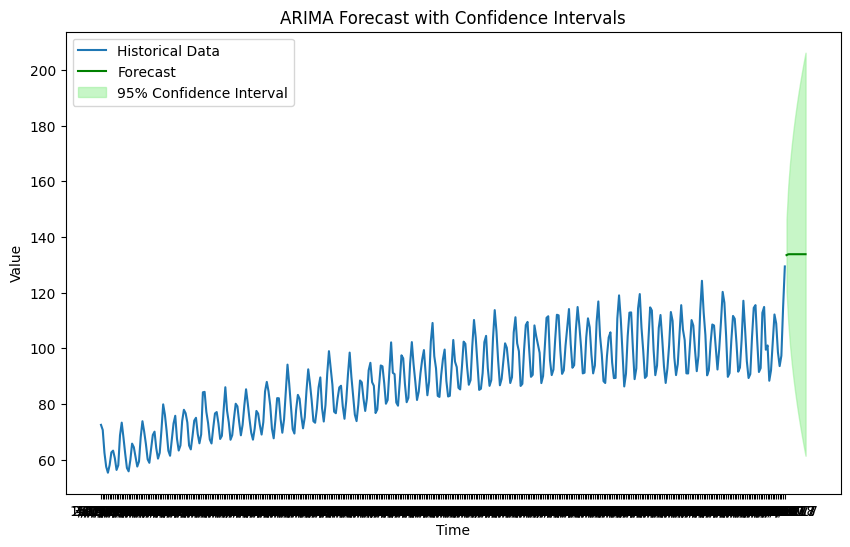

In [17]:
# Forecast with confidence intervals
forecast_steps = 12
forecast_result = model_fit.get_forecast(steps=forecast_steps)
forecast_mean = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

# Plot forecast with confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(data_po['IPG2211A2N'], label='Historical Data')
plt.plot(
    range(len(data_po), len(data_po) + forecast_steps),
    forecast_mean,
    label='Forecast',
    color='green'
)
plt.fill_between(
    range(len(data_po), len(data_po) + forecast_steps),
    conf_int.iloc[:, 0],
    conf_int.iloc[:, 1],
    color='lightgreen',
    alpha=0.5,
    label='95% Confidence Interval'
)
plt.title('ARIMA Forecast with Confidence Intervals')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


## ARIMA Forecast Analysis

The ARIMA(1,1,1) model was fitted to the first-order differenced time series, which passed the stationarity test via the Augmented Dickey-Fuller (ADF) test:

- **ADF Statistic**: −7.10  
- **p-value**: 4.08e−10  
- ✅ This confirms the series is stationary after differencing.

### Forecast Insights

- The forecasted values (green line) extend the historical trend smoothly, indicating the model captures the underlying structure well.
- **Confidence intervals** (shaded region) provide a 95% range of uncertainty around the predictions. These widen over time, reflecting increasing uncertainty as we forecast further into the future.
- The model does **not capture seasonality**, which is expected since ARIMA(1,1,1) is non-seasonal. If seasonal patterns are present in the data, a SARIMA model may be more appropriate.

### Next Steps

- Consider evaluating residuals to ensure they resemble white noise.
- If seasonality is suspected, explore SARIMA or ARIMAX models.
- Use the forecast for short-term planning, anomaly detection, or as input to broader predictive systems.
